# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

**1. How are trees constructed?**

- You start with the entire dataset, and you aim to split it into smaller groups based on the target variable (for example, whether someone got divorced or not).

- First, you find the best feature to split the data by. For example, a certain question may be a very strong predictor for divorce, and you could first split the data by that. You do this, by looking at which feature reduces impurity the most (i.e. which group has the has lowest Gini impurity score).

- Then, you repeat this process for each subgroup until you either reach a point where you have impurity of 0 or can no longer find meaningful splits.

- For regression tasks, instead of Gini impurity scores, you use lowest SSE.

**2. How do trees handle non-linear relationships between variables? Compare this to linear models.**

Trees handle non-linear relationships between variables really well by splitting on variables in the way described in my response to question 1. A good example is with the divorce data. There were 54 questions with response values from 0-4 where 0 meant strongly agree and 4 meant never, and the outcome variable of interest is divorce/married. The relationship between the variables and whether they are divorced or not is not really best measured by a straight line. Rather, the outcome likely depends on a combination of the answers. So, in a linear model, you could do interaction terms between questions in the divorce survey, for example, but that would get really messy, and would likely overfit with too many variables. So, trees handle these non-linear relationships between variables by splitting on them.  

**3. Why is the Gini a good loss function for categorical target variables?**

The Gini impurity score is a measure of how "mixed" the subgroups are after you split the data. With decision trees, you are trying to split the data set into smaller groups based on the target variable to make the best predictions. For predicting a categorical target variable, when you split the dataset into groups, you want one feature to split the data in such a way that the subgroups are dominated by one of the categories in the categorical target variable(s). So, the Gini impurity score is a measure of how "mixed" the subgroups are. You want a low Gini impurity score.

**4. Why do trees tend to overfit, and how can this tendency be constrained?**

Trees are prone to overfitting because they can essentially just memorize the original dataset and produce not meaningful splits/"grow out of control." They may find splits in the data that work really well for the specific sample, but don't hold true for other datasets, and may be overfitting to quirks or specificities in the first dataset. They essentially can "grow out of control" and memorize the training data, which does not usually work well for unforeseen data because it splits in unmeaningful ways towards the end, for example. You can contrain this tendency by imposing stopping rules.
- One stop rule you can use is *max-depth*, which says stop after a certain number of leaves. This is simple, but can be too rigid.
- Another is *min_impurity_decrease*, which says only split it if it reduces impurity by enough. This is more flexible and data-driven.
- A third is *min_samples_leaf*, which says do not allow terminal nodes with too few of observations. That is helpful to prevent weird splits on outliers.
In summary, trees are prone to overfitting because they can essentially just memorize the original dataset and produce not meaningful splits/"grow out of control."
Also worth noting that early stopping is a form of regularization, which is an important ML concept that refers to imposing constraints on the model to force it not to overfit.

**5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.**

False. Trees can perform really well for numeric continuous variables too and for tasks like regression. With numeric variables, tree models look for values that best divide the data. For example, if you want to predict type of landmine using voltage, you can look at the density plot from class and see that above a .75 voltage, land mine types are almost entirely either mine type 1 or 2, and below that are either 3-5. So, you can split by .75 where types 4 and 5 drop off to 0. That is how splits work with numeric predictors.  

**6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?**

While you can extend ideas of Gini impurity to go beyond two branches after a split, most people avoid that because it gets messy fast. Binary splits keep the model simple and interpretable and since trees are already sensitive to original data and can easily overfit, that is generally why we prefer to keep it simple with binary trees to avoid increased complexity, computation overhead and overfitting risks.  

**7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?**

Good thing to do is visualize the tree, and then you can check for everything below.

One way is checking the tree depth (how many levels there are to the tree) because if there are too many levels, the tree may be too deep, and may be overfitting by capturing too much noise and small details from the training set. Conversely, if it is too shallow (too little levels), it could be underfitting.

Another way is to look at how many nodes/splits there are. Too many ==> overfitting. Too little ==> underfitting.

Another way is just examining the accuracy on the training and test set. If the training set accuracy is really high and the test set is really low ==> you are probably overfitting. If really bad on both ==> probably underfitting.


If overfitting, you can do response in question 4 regularization techniques.

In [1]:
! git clone https://github.com/isaactabor21/trees/

Cloning into 'trees'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 123 (delta 16), reused 5 (delta 5), pack-reused 104 (from 1)
Receiving objects: 100% (123/123), 74.45 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (28/28), done.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [9]:
import pandas as pd
cars = pd.read_csv("/content/trees/assignment/data/cars_hw.csv")

In [10]:
cars.info()
cars.drop('Unnamed: 0', axis=1, inplace=True)
cars.info()
cars.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             ----------

Index(['Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

* 976 observations
* 11 variables / features / covariates
* Available variables: 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price'




In [11]:
cars.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000



2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.


In [25]:
categorical_variables = cars[['Make','Color','Body_Type','No_of_Owners','Fuel_Type','Transmission','Transmission_Type']]
dummies = pd.get_dummies(categorical_variables,)
numeric_vars = cars[['Mileage_Run','Make_Year','Seating_Capacity']]
X = pd.concat([dummies, numeric_vars], axis=1)
y = cars['Price']


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                                                              random_state=65) # For replication purposes


3. **From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`.**

In [32]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


**Use a train-test split to iterate over possible values for min_samples_leaf, computing the  𝑅2  for each value between 1 and 25.**

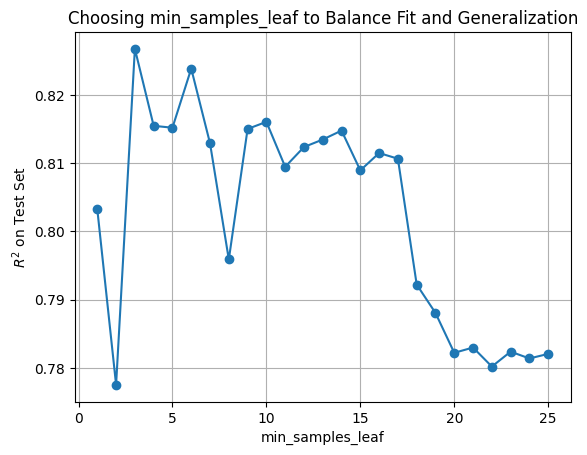

In [33]:
# Used ChatGPT for this part.
r2_scores = []  # Store R^2 for each leaf size

# Try min_samples_leaf from 1 to 25
for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=65)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot the results
plt.plot(range(1, 26), r2_scores, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('$R^2$ on Test Set')
plt.title('Choosing min_samples_leaf to Balance Fit and Generalization')
plt.grid(True)
plt.show()

**What choice achieves the highest  𝑅2  on the test data?**

* Best R2 on the test data is 3.

5. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set?

In [40]:
cars.columns

Index(['Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

In [39]:
X.columns

Index(['Make_Chevrolet', 'Make_Datsun', 'Make_Ford', 'Make_Honda',
       'Make_Hyundai', 'Make_Jeep', 'Make_Kia', 'Make_MG Motors',
       'Make_Mahindra', 'Make_Maruti Suzuki', 'Make_Nissan', 'Make_Renault',
       'Make_Skoda', 'Make_Tata', 'Make_Toyota', 'Make_Volkswagen',
       'Color_beige', 'Color_black', 'Color_blue', 'Color_bronze',
       'Color_brown', 'Color_golden', 'Color_green', 'Color_grey',
       'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_crossover',
       'Body_Type_hatchback', 'Body_Type_muv', 'Body_Type_sedan',
       'Body_Type_suv', 'No_of_Owners_1st', 'No_of_Owners_2nd',
       'No_of_Owners_3rd', 'Fuel_Type_diesel', 'Fuel_Type_petrol',
       'Fuel_Type_petrol+cng', 'Transmission_4-Speed', 'Transmission_5-Speed',
       'Transmission_6-Speed', 'Transmission_7-Speed', 'Transmission_CVT',
       'Transmission_Type_Automatic', 'Transmission_Type_Manual',
       'Mileage_Run', 'Mak

In [36]:
# ChatGPT helped me with this some too
import numpy as np
from sklearn.metrics import mean_squared_error


# 1. Fit the model with your optimal parameter
cart = DecisionTreeRegressor(min_samples_leaf=3, random_state=100)
cart.fit(X_train, y_train)

# 2. Predict on test set
y_hat = cart.predict(X_test)

# 3. Evaluate performance
r2 = r2_score(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

print("R² on test set: ", r2)
print("RMSE on test set: ", rmse)

R² on test set:  0.8280326093289493
RMSE on test set:  148182.54391412533


**Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?**

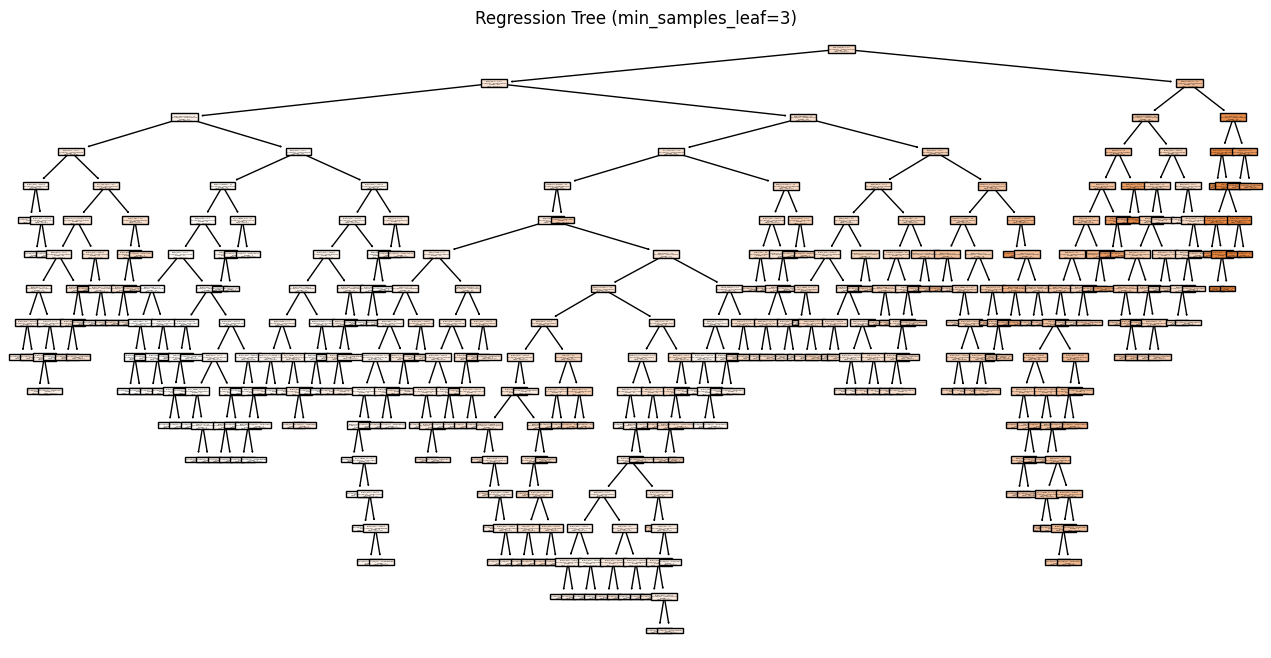

In [41]:
# Plot the regression tree (a.k.a. dendrogram)
plt.figure(figsize=(16, 8))
plot_tree(cart, feature_names=X.columns, filled=True)
plt.title("Regression Tree (min_samples_leaf=3)")
plt.show()


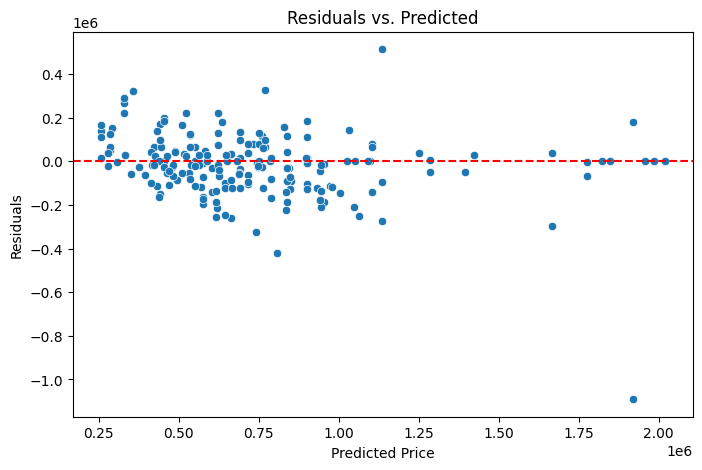

In [43]:
import seaborn as sns
residuals = y_test - y_hat

# Plot residuals vs predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_hat, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()


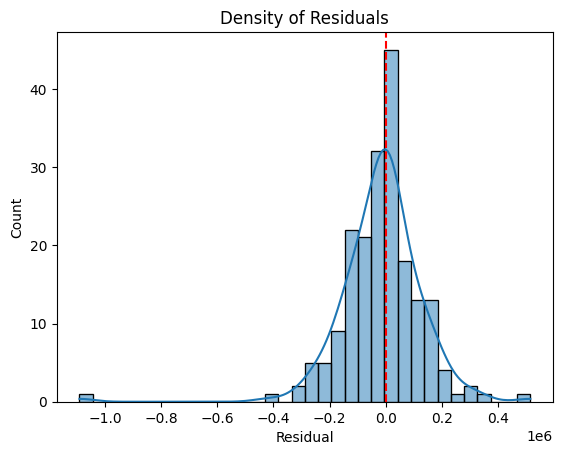

In [44]:
sns.histplot(residuals, kde=True)
plt.title("Density of Residuals")
plt.xlabel("Residual")
plt.axvline(0, color='red', linestyle='--')
plt.show()


6. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.8422
RMSE: 141961.41


Comparing with the tree: R² on test set:  0.8280326093289493
RMSE on test set:  148182.54391412533

My linear regression is performing better on the test set. One theory is that there are way too leaves, and it may be overfitting a lot.



7. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

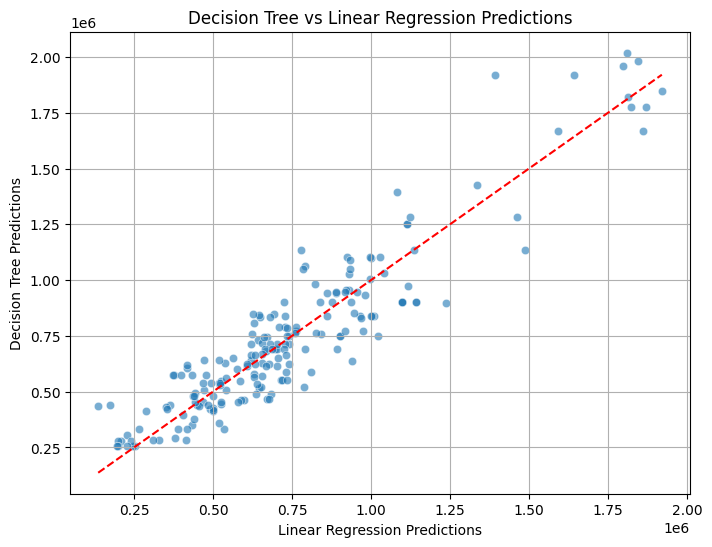

In [52]:
# 1. Predict using both models
cart_preds = cart.predict(X_test)
lr_preds = lr.predict(X_test)

# 2. Make a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=lr_preds, y=cart_preds, alpha=0.6)

plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Decision Tree vs Linear Regression Predictions")
plt.plot([min(lr_preds), max(lr_preds)],
         [min(lr_preds), max(lr_preds)], color='red', linestyle='--')  # reference line y = x
plt.grid(True)
plt.show()


* The predictions follow a straight line pretty well, so they are predicting similar things. This could be an indication that a linear relationship honestly captures the data well.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?